### Sales Forecasting and Product Trend Analysis For Dropshipping stores 

**Submitted by** : Fathimath Farshana k k 

**Domain**: E-Commerce & Dropshipping  
**Focus Areas**: Revenue Forecasting | Trend Analysis | Customer Behavior  
**Dataset**: Online Retail II  
**Tools Used**: Python, Pandas, Matplotlib, Seaborn, statsmodels, prophet, XGBoost.

###  Project Objective

To analyze historical retail data to uncover revenue trends, identify top-selling products, and forecast future sales — supporting inventory planning, marketing, and business growth in dropshipping environments.

In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##   Data Loading  

In [250]:
df = pd.read_excel(r"C:/Users/farsh/Downloads/online+retail+ii/online_retail_II.xlsx")

##  Data Cleaning & Feature Engineering  

In [254]:
print(df.head())
print(df.shape)
print(df.columns)
print(df.isnull().sum())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
(525461, 8)
Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')
Invoice             0
StockCode           0
Description      2928
Qua

In [256]:
df = df.dropna(subset=['Customer ID'])

In [258]:
df = df.drop_duplicates()

In [259]:
df = df.copy()
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Revenue'] = df['Quantity'] * df['Price']
df_daily = df.set_index('InvoiceDate').resample('D').agg({'Revenue': 'sum'})
df_daily = df_daily.fillna(0)
print(df_daily.head())
print(df_daily.tail())

              Revenue
InvoiceDate          
2009-12-01   42554.40
2009-12-02   52398.26
2009-12-03   61468.76
2009-12-04   33536.26
2009-12-05    9803.05
              Revenue
InvoiceDate          
2010-12-05   30970.28
2010-12-06   30258.77
2010-12-07   53061.64
2010-12-08   37894.06
2010-12-09   37139.86


In [262]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 410763 entries, 0 to 525460
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      410763 non-null  object        
 1   StockCode    410763 non-null  object        
 2   Description  410763 non-null  object        
 3   Quantity     410763 non-null  int64         
 4   InvoiceDate  410763 non-null  datetime64[ns]
 5   Price        410763 non-null  float64       
 6   Customer ID  410763 non-null  float64       
 7   Country      410763 non-null  object        
 8   Revenue      410763 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.3+ MB
None
            Quantity                    InvoiceDate          Price  \
count  410763.000000                         410763  410763.000000   
mean       12.923735  2010-06-30 19:56:14.853674752       3.908358   
min     -9360.000000            2009-12-01 07:45

In [264]:
df = df.copy()
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Weekday'] = df['InvoiceDate'].dt.weekday
df['Hour'] = df['InvoiceDate'].dt.hour
df['IsReturn'] = df['Invoice'].astype(str).str.startswith('C')

In [266]:
print(df.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  Revenue  Year  \
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom     83.4  2009   
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom     81.0  2009   
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom     81.0  2009   
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom    100.8  2009   
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom     30.0  2009   

   Month  Day  Weekday  Hour  IsReturn  
0     12    1        1     7     False  
1     12    1        1     7     False  

In [452]:
sns.set(style="whitegrid")

IQR Method

In [455]:
series = df_daily['Revenue'].copy()
Q1 = series.quantile(0.25)
Q3 = series.quantile(0.75)
IQR = Q3 - Q1
lower_iqr = Q1 - 1.5 * IQR
upper_iqr = Q3 + 1.5 * IQR
outlier_iqr = (series < lower_iqr) | (series > upper_iqr)
mask_iqr = (series < lower_iqr) | (series > upper_iqr)

Z-Score Method

In [458]:
from scipy import stats
from scipy.stats.mstats import winsorize
z = np.abs(stats.zscore(series + 1e-9)) 
mask_z = pd.Series(z > 3, index=series.index)

IsolationForest

In [461]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.01, random_state=42)
mask_iso = iso.fit_predict(series.values.reshape(-1,1)) == -1

In [463]:
mask_combined = mask_iqr | mask_z | mask_iso
print("Outlier counts — IQR:", mask_iqr.sum(),
      "| Z-score:", mask_z.sum(),
      "| IsoForest:", mask_iso.sum(),
      "| Combined:", mask_combined.sum())

Outlier counts — IQR: 9 | Z-score: 5 | IsoForest: 4 | Combined: 9


In [465]:
rolling_med = series.rolling(window=7, center=True, min_periods=1).median()
series_clean = series.copy()
series_clean[mask_combined] = rolling_med[mask_combined]
df_daily['Revenue_clean'] = series_clean

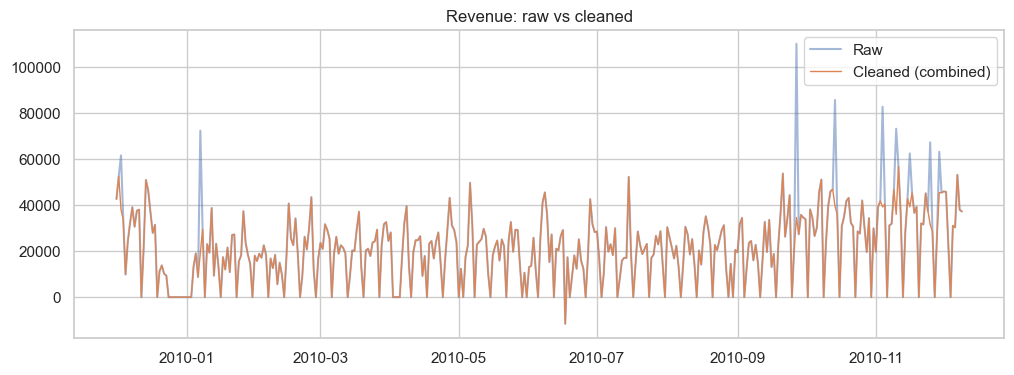

In [467]:
plt.figure(figsize=(12,4))
plt.plot(series, label='Raw', alpha=0.5)
plt.plot(series_clean, label='Cleaned (combined)', linewidth=1)
plt.legend()
plt.title('Revenue: raw vs cleaned')
plt.show()

In [468]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_daily_clean = df_daily.copy()
df_daily_clean['Revenue_clean'] = scaler.fit_transform(df_daily_clean[['Revenue']])
print(df_daily_clean.head())

              Revenue  Revenue_clean
InvoiceDate                         
2009-12-01   42554.40       0.445592
2009-12-02   52398.26       0.526637
2009-12-03   61468.76       0.601315
2009-12-04   33536.26       0.371345
2009-12-05    9803.05       0.175947


In [471]:
df.to_csv("cleaned_online_retail_II.csv", index=False)

## Top-Selling Products

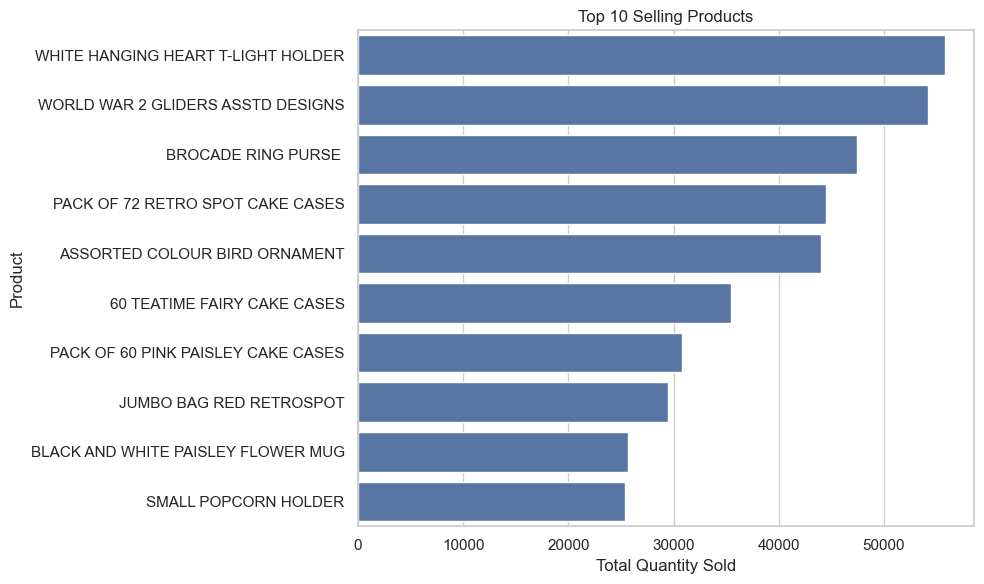

In [473]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

## Product Trend Analysis of Top 10 Selling Products
The monthly sales trends of the top 10 products are visualized to identify seasonal demand patterns, consistent performers, and declining products.


In [476]:
top_df = df[df['Description'].isin(top_products.index)]
trend_df = top_df.groupby([pd.Grouper(key='InvoiceDate', freq='M'), 'Description'])['Quantity'].sum().reset_index()

C:\Users\farsh\AppData\Local\Temp\ipykernel_2092\3064829975.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  trend_df = top_df.groupby([pd.Grouper(key='InvoiceDate', freq='M'), 'Description'])['Quantity'].sum().reset_index()


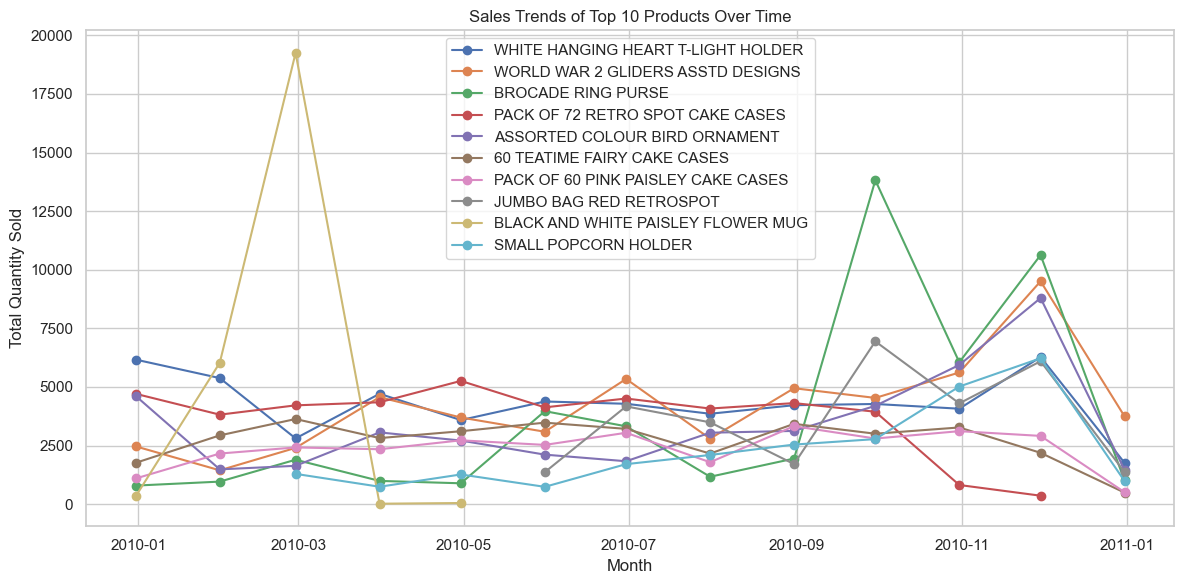

In [479]:
plt.figure(figsize=(12, 6))
for product in top_products.index:
    product_data = trend_df[trend_df['Description'] == product]
    plt.plot(product_data['InvoiceDate'], product_data['Quantity'], marker='o', label=product)
    
plt.title('Sales Trends of Top 10 Products Over Time')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Monthly Revenue Trend

In [482]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M').astype(str)
monthly_revenue = df.groupby('YearMonth')['Revenue'].sum().reset_index()

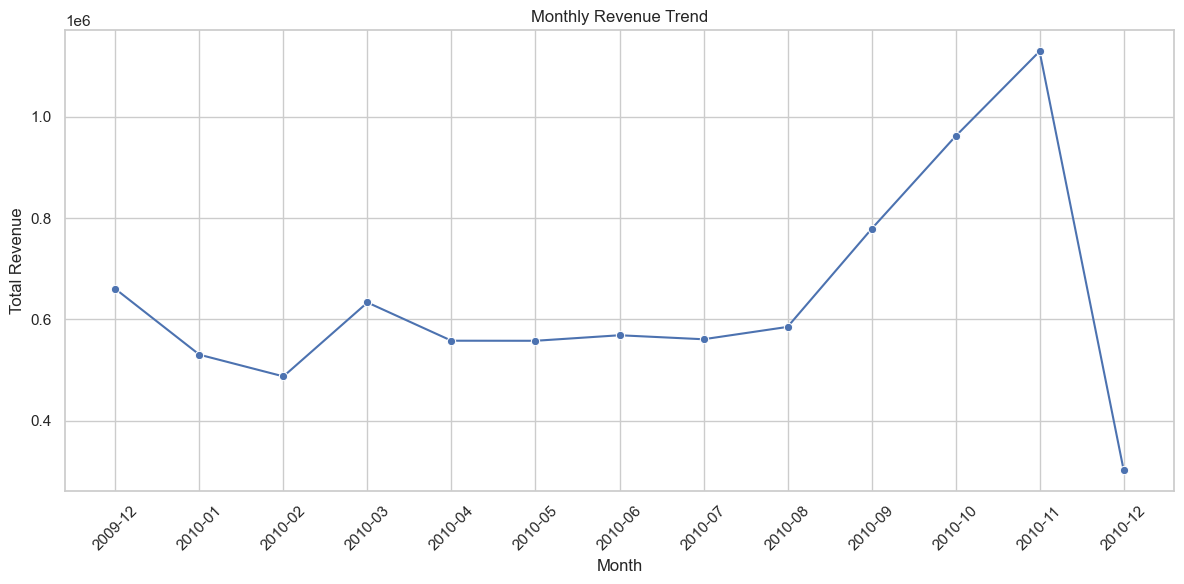

In [483]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='YearMonth', y='Revenue', marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Top 10 Countries by Revenue

In [487]:
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).reset_index()

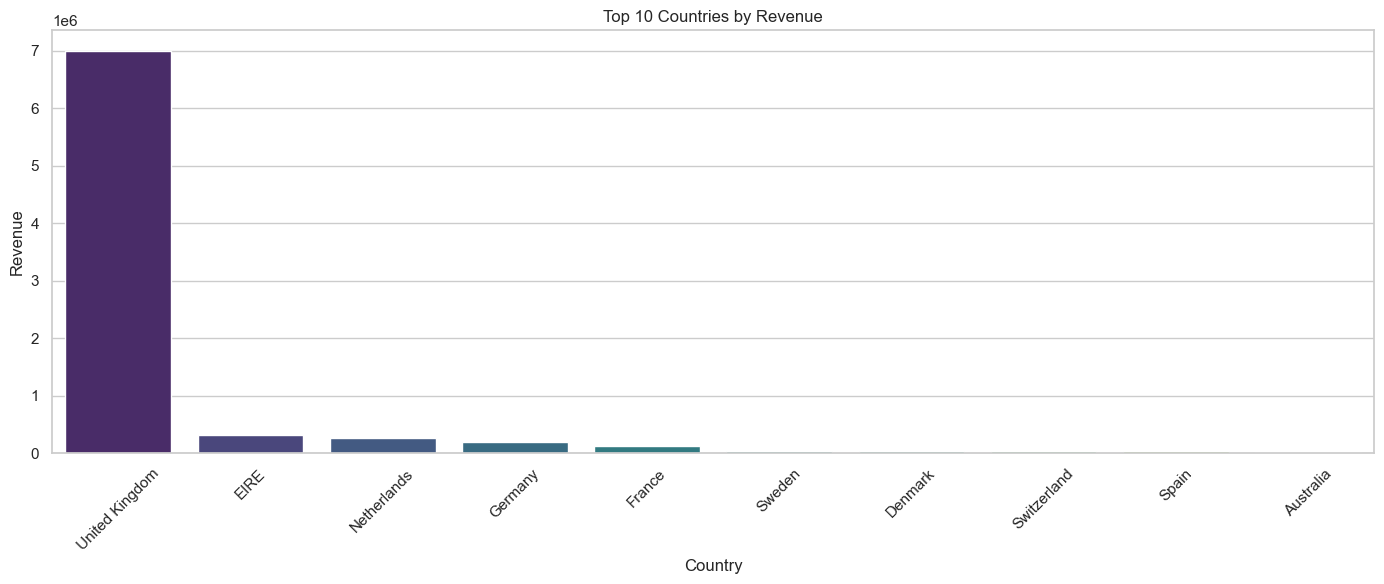

In [489]:
plt.figure(figsize=(14,6))
sns.barplot(data=country_revenue.head(10), x='Country', y='Revenue', hue='Country', palette='viridis', legend=False)
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Returns vs. Purchases Analysis

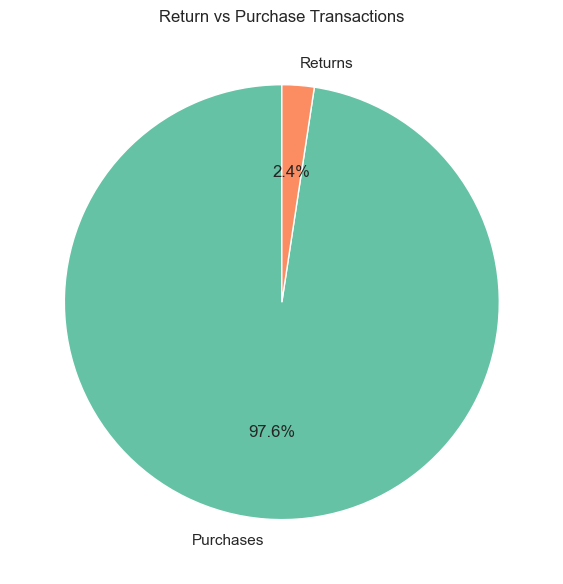

Total revenue lost to returns: -483378.16


In [492]:
df.loc[:, 'IsReturn'] = df['Quantity'] < 0
return_counts = df['IsReturn'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    return_counts,
    labels=['Purchases', 'Returns'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66c2a5','#fc8d62']
)
plt.title('Return vs Purchase Transactions')
plt.tight_layout()
plt.show()

returns_df = df[df['IsReturn'] == True].copy()
returns_df.loc[:, 'ReturnRevenue'] = returns_df['Quantity'] * returns_df['Price']
total_return_revenue = returns_df['ReturnRevenue'].sum()
print(f"Total revenue lost to returns: {total_return_revenue:.2f}")


## Hourly Revenue Analysis

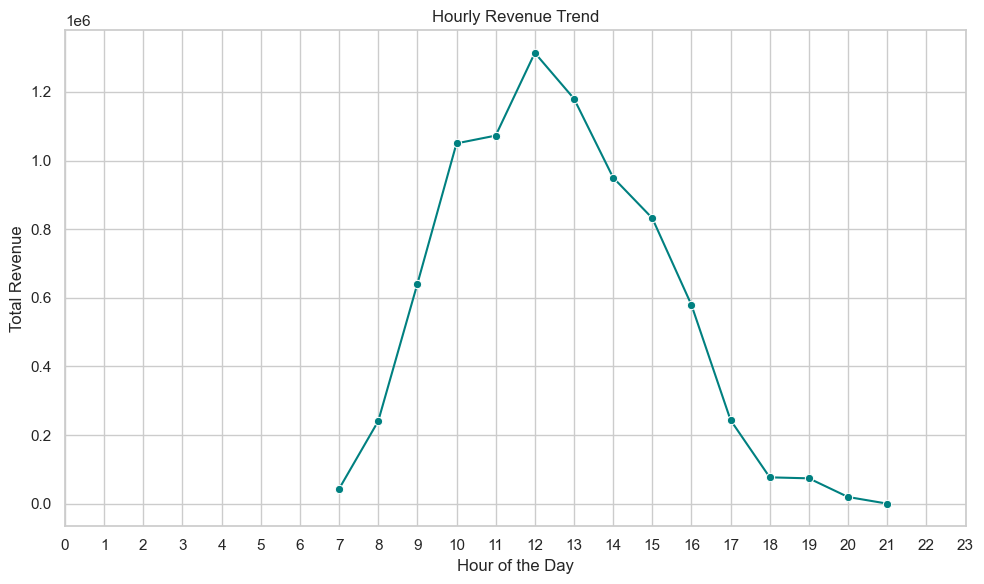

In [495]:
df['Hour'] = df['InvoiceDate'].dt.hour
hourly_revenue = df.groupby('Hour')['Revenue'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=hourly_revenue, x='Hour', y='Revenue', marker='o', color='teal')
plt.title('Hourly Revenue Trend')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Revenue')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# Day of Week Revenue Analysis
# Mapping weekdays for clear labels

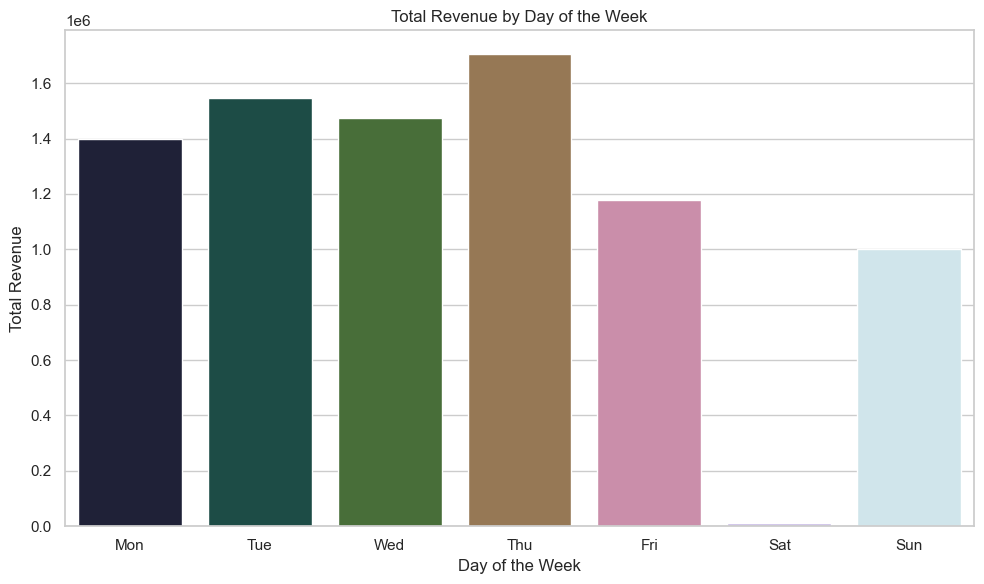

In [498]:
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
weekday_map = {
    0: 'Mon',
    1: 'Tue',
    2: 'Wed',
    3: 'Thu',
    4: 'Fri',
    5: 'Sat',
    6: 'Sun'
}
df['DayName'] = df['DayOfWeek'].map(weekday_map)
day_revenue = df.groupby('DayName')['Revenue'].sum().reindex(
    ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(
    data=day_revenue,
    x='DayName',
    y='Revenue',
    hue='DayName',
    palette='cubehelix',
    legend=False
)
plt.title('Total Revenue by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

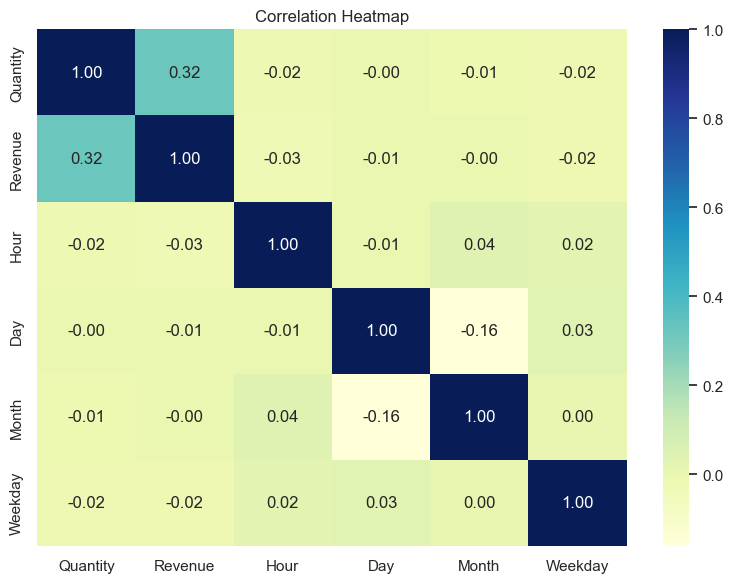

In [500]:
df['Hour'] = df['InvoiceDate'].dt.hour
df['Day'] = df['InvoiceDate'].dt.day
df['Month'] = df['InvoiceDate'].dt.month
df['Weekday'] = df['InvoiceDate'].dt.weekday  

corr_matrix = df[['Quantity', 'Revenue', 'Hour', 'Day', 'Month', 'Weekday']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

## MODEL BUILDING

## Forecasting with Prophet

In this section, we use Facebook Prophet to forecast monthly revenue for the dropshipping store, enabling data-driven inventory and marketing planning.


## Monthly Sales Forecasting using Prophet

In [505]:
!pip install prophet

In [506]:
from prophet import Prophet
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M').astype(str)
monthly_revenue_str = df.groupby('YearMonth')['Revenue'].sum().reset_index()
monthly_revenue = monthly_revenue_str.copy()
monthly_revenue['YearMonth'] = pd.to_datetime(monthly_revenue['YearMonth'], format='%Y-%m')
prophet_df = monthly_revenue.rename(columns={'YearMonth': 'ds', 'Revenue': 'y'})
model = Prophet()
model.fit(prophet_df)
future = model.make_future_dataframe(periods=6, freq='M')
forecast = model.predict(future)

20:11:25 - cmdstanpy - INFO - Chain [1] start processing
20:11:25 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\farsh\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


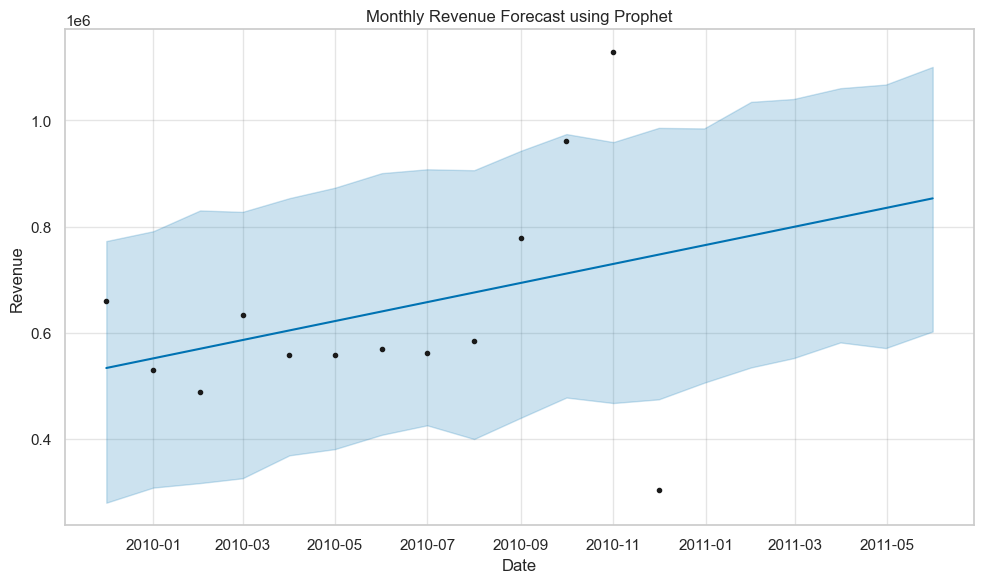

In [507]:
import matplotlib.pyplot as plt
fig = model.plot(forecast)
plt.title('Monthly Revenue Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

## Model Evaluation

To assess the Prophet model's performance, we calculate the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) between predicted and actual values on historical data.


In [512]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
forecast_filtered = forecast[['ds', 'yhat']].copy()
merged = pd.merge(prophet_df, forecast_filtered, on='ds')

In [514]:
actual = merged['y']
predicted = merged['yhat']

In [516]:
mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
mape = np.mean(np.abs((actual - predicted) / actual)) * 100
accuracy = 100 - mape

In [518]:
print(f"Prophet - MAPE: {mape:.2f}%, Accuracy: {accuracy:.2f}%")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Prophet - MAPE: 25.46%, Accuracy: 74.54%
Mean Absolute Error (MAE): 140307.27
Root Mean Squared Error (RMSE): 192252.33


## Forecast Components

The following plots display the trend identified by Prophet in the sales data.


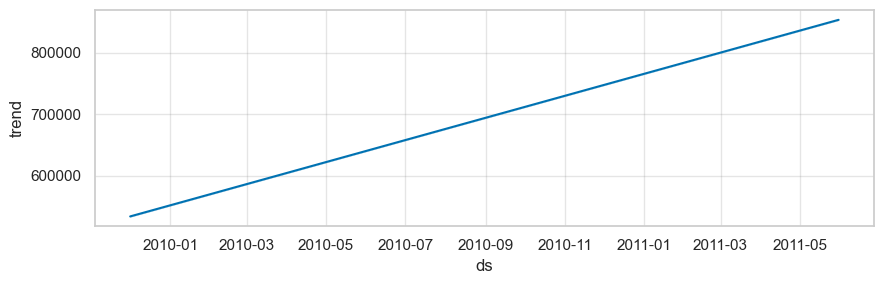

In [521]:
fig2 = model.plot_components(forecast)
plt.tight_layout()
plt.show()

### Prophet Forecast Interpretation
Prophet achieved a MAPE of 25.46%, corresponding to an accuracy of 74.54%.  
This suggests the model performs well in capturing seasonal patterns and long-term sales trends.  
However, the relatively high MAE (140,307.27) and RMSE (192,252.33) indicate that it struggles with predicting large, short-term fluctuations in sales values.


### Forecasting with SARIMA
In this section, we use the Seasonal ARIMA model to forecast daily revenue, capturing overall trends and repeating seasonal patterns. This helps in establishing a reliable baseline for sales planning and inventory management.

In [525]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [527]:
ts_data = df_daily['Revenue']
train_size = int(len(ts_data) * 0.9)
train, test = ts_data[:train_size], ts_data[train_size:]

In [529]:
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,30))
model_fit = model.fit(disp=False)
forecast = model_fit.forecast(steps=len(test))

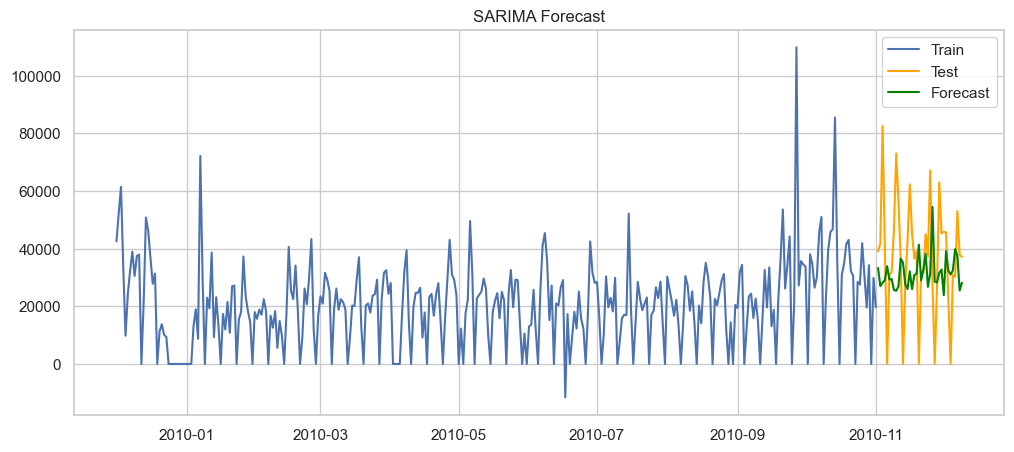

In [530]:
plt.figure(figsize=(12,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(test.index, forecast, label='Forecast', color='green')
plt.legend()
plt.title('SARIMA Forecast')
plt.show()

## Model Evaluation

In [532]:
actual_sarima = test
predicted_sarima = forecast

In [536]:
mape_sarima = np.mean(
    np.abs((actual_sarima - predicted_sarima) / actual_sarima.replace(0, np.nan))
) * 100

mae_sarima = mean_absolute_error(actual_sarima, predicted_sarima)
rmse_sarima = np.sqrt(mean_squared_error(actual_sarima, predicted_sarima))

accuracy_sarima = 100 - mape_sarima

In [538]:
print(f"SARIMA - MAPE: {mape_sarima:.2f}%, Accuracy: {accuracy_sarima:.2f}%")
print(f"Mean Absolute Error (MAE): {mae_sarima:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_sarima:.2f}")

SARIMA - MAPE: 30.34%, Accuracy: 69.66%
Mean Absolute Error (MAE): 17223.33
Root Mean Squared Error (RMSE): 22320.66


### SARIMA Forecast Interpretation
SARIMA recorded a MAPE of 30.34%, giving an accuracy of 69.66%.  
It achieved much lower MAE (17,223.33) and RMSE (22,320.66) compared to Prophet, meaning it handles smaller-scale fluctuations more accurately.  
However, its higher MAPE suggests it is less precise overall when predicting percentage-based errors and may underperform in capturing seasonal patterns.


## Forecasting with XGBoost
In this section, we use the XGBoost regression model with lag-based features to forecast daily revenue. This approach is effective at adapting to short-term variations, making it useful for capturing recent sales momentum and supporting agile business decisions.


In [544]:
import xgboost as xgb

In [546]:
df_lag = df_daily.copy()
df_lag['lag1'] = df_lag['Revenue'].shift(1)
df_lag['lag2'] = df_lag['Revenue'].shift(2)
df_lag['lag3'] = df_lag['Revenue'].shift(3)

In [548]:
df_lag = df_lag.dropna()
X = df_lag[['lag1', 'lag2', 'lag3']]
y = df_lag['Revenue']

In [550]:
train_size = int(len(X) * 0.9)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [552]:
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
model_xgb.fit(X_train, y_train)
forecast_xgb = model_xgb.predict(X_test)

## Model Evaluation

In [555]:
actual_xgb = test
predicted_xgb = forecast

In [557]:
mape_xgb = np.mean(
    np.abs((actual_xgb - predicted_xgb) / actual_xgb.replace(0, np.nan))
) * 100

mae_xgb = mean_absolute_error(actual_xgb, predicted_xgb)
rmse_xgb = np.sqrt(mean_squared_error(actual_xgb, predicted_xgb))
accuracy_xgb = 100 - mape_xgb

In [559]:
print(f"XGBoost - MAPE: {mape_xgb:.2f}%, Accuracy: {accuracy_xgb:.2f}%")
print(f"Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")

XGBoost - MAPE: 30.34%, Accuracy: 69.66%
Mean Absolute Error (MAE): 17223.33
Root Mean Squared Error (RMSE): 22320.66


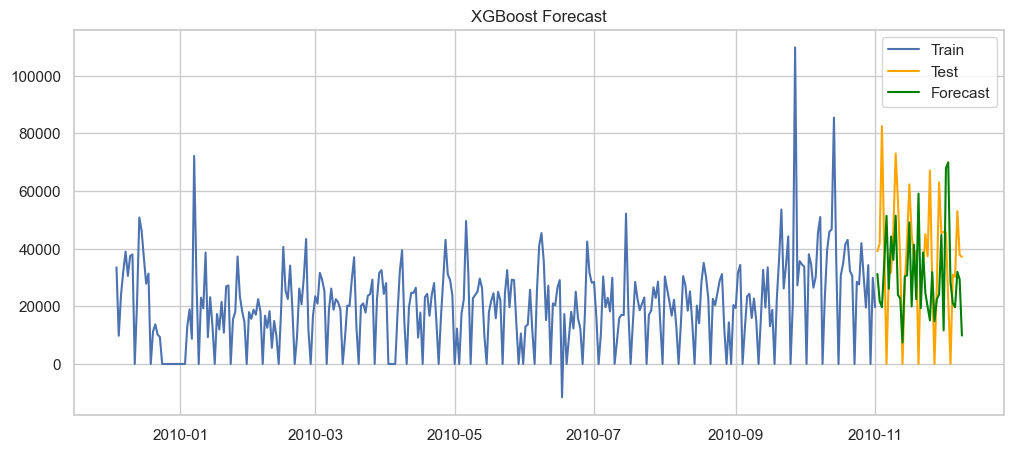

In [561]:
plt.figure(figsize=(12,5))
plt.plot(y_train.index, y_train, label='Train')
plt.plot(y_test.index, y_test, label='Test', color='orange')
plt.plot(y_test.index, forecast_xgb, label='Forecast', color='green')
plt.legend()
plt.title('XGBoost Forecast')
plt.show()

### XGBoost Forecast Interpretation

 XGBoost produced a MAPE of 30.34% and an accuracy of 69.66%, identical to SARIMA.  
It also achieved low MAE (17,223.33) and RMSE (22,320.66), indicating strong performance for short-term predictions.  

## Model Performance Comparison

| Model   | MAPE (%) | Accuracy (%) | MAE        | RMSE       |
|---------|----------|--------------|------------|------------|
| Prophet | 25.46    | 74.54        | 140307.27  | 192252.33  |
| SARIMA  | 30.34    | 69.66        | 17223.33   | 22320.66   |
| XGBoost | 30.34    | 69.66        | 17223.33   | 22320.66   |

---
Among the models, Prophet achieved the highest accuracy (74.54%) and lowest MAPE, making it more suitable for long-term sales forecasting.  
SARIMA and XGBoost excelled in producing lower error magnitudes (MAE and RMSE), showing stronger performance for short-term variability.

In [565]:
df.to_csv("cleaned_online_retail_capstone.csv", index=False)

print("Cleaned dataset saved successfully.")

Cleaned dataset saved successfully.


## 📌 Conclusion

Analysis of the **Online Retail II** dataset shows that sales are highly seasonal, with noticeable peaks in specific months for top products such as the *Jumbo Bag Red Retrospot* and *World War 2 Gliders*. Seasonal home décor and utility items dominate the best-seller list.

In forecasting, **Prophet** outperformed SARIMA and XGBoost with the highest accuracy (74.54%) and the lowest error metrics (MAPE: 25.46%, RMSE: 192,252). This suggests Prophet is better suited for capturing the dataset’s seasonality and trend patterns.

These insights highlight the importance of focusing on peak-demand months, stocking top-performing products, and leveraging Prophet-based models for future sales prediction.

